## 获取不同占比下ROI的fisher系数

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

$F=\frac{S_b}{S_w}=\frac{\sum_{i=1}^{n}(\mu_{iA}-\mu_{iB})^2}{\sum_{i=1}^n(\sigma_{iA}^2+\sigma_{iB}^2)}$
1. 对特征进行标准化
2. 根据标签获取一组下不同类的数据
3. 用2个DataFrame分别记录，一组下不同类的每一个特征的均值和方差
4. 根据公式得到该组下的统计值

In [50]:
def get_score(file):
    data=pd.read_excel(file).iloc[:,1:]##去掉第一列的文件名
    X=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    
    ##标准化
    scaler=StandardScaler()
    X=scaler.fit_transform(X.astype(np.float64))
    X=pd.DataFrame(X)
    
    ##得到标准化后的样本
    scaler_data=pd.concat([X,y],axis=1)
    
    ##根据样本标准，得到不同的类别
    df=[scaler_data.loc[scaler_data["分类"]==i] for i in np.arange(2)]
    
    ##获得每一类中每个特征的均值和方差
    mean=df[0].apply(lambda x:np.mean(x))
    var=df[1].apply(lambda x:np.var(x))
    
   #根据公式，得出统计值
    s_b=np.sum((mean[0]-mean[1])**2)
    s_w=np.sum(var[0]+var[1])

    fisher=s_b/s_w

    return fisher

## 获得统计值

In [47]:
os.chdir("C:/Users/lenovo/Desktop/branch/fisher")##要求文件夹下只有3个特征文件
files=os.listdir()
scores=list()

for f in files:
    result=get_score(f)
    scores.append(result)
    print(f+":"+str(result))

result_01_25.xls:0.15346994868182318
result_01_50.xls:0.004504495163668069
result_01_75.xls:0.05131827256409662


## 结果可视化

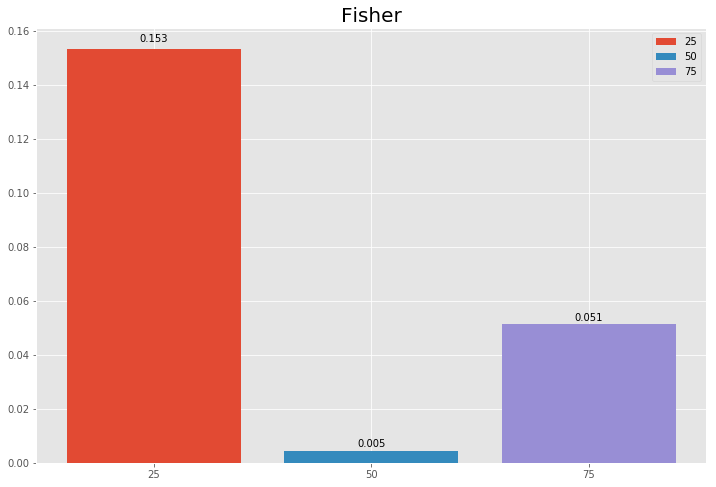

In [49]:
%matplotlib inline
with plt.style.context("ggplot"):
    fig,ax=plt.subplots(figsize=(12,8))
    
    x=np.arange(3)
    groups=["25","50","75"]
    
    bars=list()
    for i in range(3):
        bar=ax.bar(x[i],scores[i],label=groups[i])
        bars.append(bar)

    
    ax.set_title("Fisher",fontsize=20)
    ax.legend()
    plt.xticks(range(3),groups)
    
    for bar in bars: 
        for b in bar:
            height = b.get_height()
            height = float(("%.3f" % height))
            ax.text(b.get_x() + b.get_width() / 2, height*1.015, str(height), ha="center", va="bottom") 
    